<a href="https://colab.research.google.com/github/lucila-03/ML/blob/main/MVP_Imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Definição do Problema *

### Classificador de imagens binária - Pinguim e Tartaruga

In [72]:
# Importação dos pacotes
from keras import layers
from keras import models
from keras import optimizers
import gdown
import os
import zipfile
from sklearn.model_selection import train_test_split
import shutil
import random
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.metrics as skm
import itertools
import urllib.request
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from tensorflow.keras.preprocessing import image
from keras.optimizers import Adam
import os
from sklearn.model_selection import train_test_split
import shutil
import random
import math
import numpy as np
import zipfile
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as skm
import itertools
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


#### Utilidades

`plot_confusion_matrix` é uma função python que imprime uma matriz de confusão

In [73]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada definindo `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão sem normalização')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Label real')
    plt.xlabel('Label predito')

### 2. Carga de Dados

In [74]:
!git clone https://github.com/lucila-03/ML

train_dir = 'ML/train'
val_dir = 'ML/test'
test_dir = 'ML/valid'



fatal: destination path 'ML' already exists and is not an empty directory.


In [75]:
batch_size = 332
img_height = 224
img_width = 224
num_classes = 1

In [76]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# Criação dos data generators
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size,
                                                    class_mode='binary') #training set

val_generator = test_datagen.flow_from_directory(val_dir,
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size,
                                                class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                target_size=(img_height, img_width),
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 362 images belonging to 2 classes.
Found 72 images belonging to 2 classes.
Found 13 images belonging to 2 classes.


Após alguns testes, foi identificado que fazer um mix do relu com o elu indo até 512, demora um pouco mais, mas é o que apresenta melhores resultados

In [77]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='elu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='elu'),  # Nova camada Dense com 512 unidades e ELU
    tf.keras.layers.Dense(num_classes, activation='sigmoid')
])

In [78]:
model.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])

Após várias tentativas, 60 epochs é o número mais próximo do ideal, talvez com o aumento das imagens de treino, a acurácia seja melhor.

In [79]:
epochs = 60
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)



Epoch 1/10
2/2 [==============================] - 85s 72s/step - loss: 16.9193 - accuracy: 0.4558 - val_loss: 0.8279 - val_accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 67s 59s/step - loss: 0.6799 - accuracy: 0.5442 - val_loss: 0.6518 - val_accuracy: 0.6528
Epoch 3/10
2/2 [==============================] - 65s 9s/step - loss: 0.6947 - accuracy: 0.6934 - val_loss: 2.8407 - val_accuracy: 0.5000
Epoch 4/10
2/2 [==============================] - 65s 57s/step - loss: 2.1071 - accuracy: 0.5387 - val_loss: 0.9936 - val_accuracy: 0.5000
Epoch 5/10
2/2 [==============================] - 66s 59s/step - loss: 0.7139 - accuracy: 0.5691 - val_loss: 0.6745 - val_accuracy: 0.5278
Epoch 6/10
2/2 [==============================] - 62s 8s/step - loss: 0.6725 - accuracy: 0.5414 - val_loss: 0.6696 - val_accuracy: 0.5556
Epoch 7/10
2/2 [==============================] - 62s 56s/step - loss: 0.6434 - accuracy: 0.7099 - val_loss: 0.6598 - val_accuracy: 0.6389
Epoch 8/10
2/2 [============

Com a acurácia apresentada, talvez seja interessante saber a quantidade de imagens em cada pasta se houve diferença significativa.

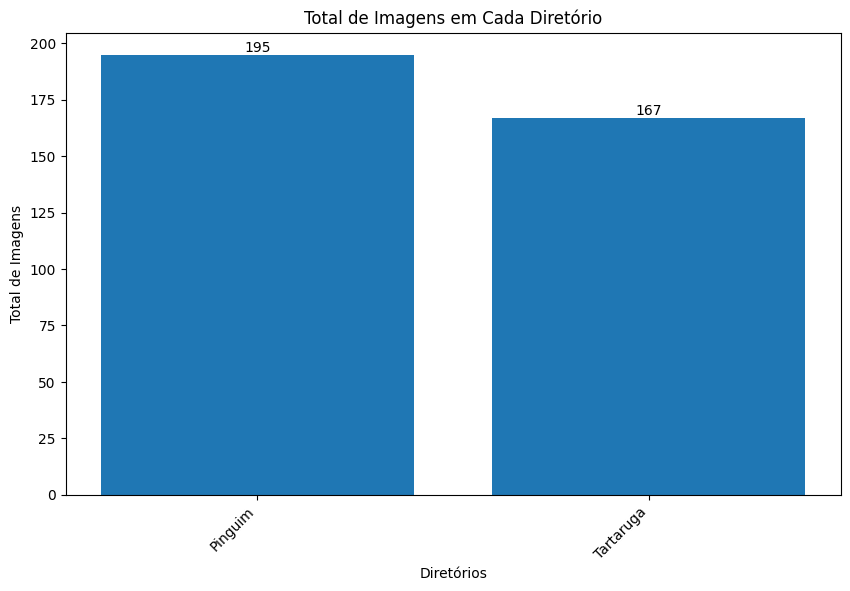

In [80]:
# Lista para armazenar o total de imagens em cada diretório
total_imagens_por_figura = []

# Lista para armazenar os nomes dos diretórios
nome_pastas = []

# Percorrendo os diretórios
for diretorio in os.listdir(train_dir):
    # Verificando se é um diretório
    if os.path.isdir(os.path.join(train_dir, diretorio)):
        # Contando o total de imagens no diretório
        total_imagens = len(os.listdir(os.path.join(train_dir, diretorio)))
        total_imagens_por_figura.append(total_imagens)
        nome_pastas.append(diretorio)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(nome_pastas, total_imagens_por_figura)
plt.xlabel('Diretórios')
plt.ylabel('Total de Imagens')
plt.title('Total de Imagens em Cada Diretório')
plt.xticks(rotation=45, ha='right')

# Adicionando os valores acima das barras
for i, v in enumerate(total_imagens_por_figura):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

Tem mais pinguim que tartaruga, a quantidde de imagens disponibilzadas no diretório é superior, mas a diferença na quantidade de imagens de pinguim e tartaruga não é significativa.

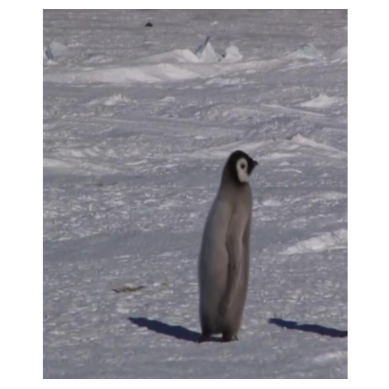

1/1 [==============================] - 0s 139ms/step
Label: Pinguim
Previsão: Tartaruga
Probabilidade: 0.35830647




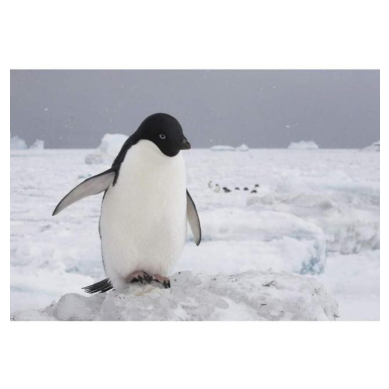

1/1 [==============================] - 1s 775ms/step
Label: Pinguim
Previsão: Tartaruga
Probabilidade: 0.25100246




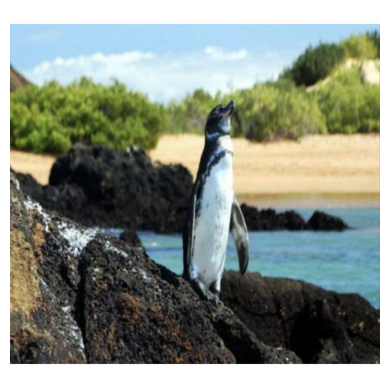

1/1 [==============================] - 0s 84ms/step
Label: Pinguim
Previsão: Tartaruga
Probabilidade: 0.4480674




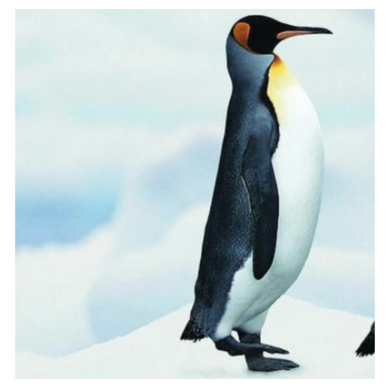

1/1 [==============================] - 0s 68ms/step
Label: Pinguim
Previsão: Tartaruga
Probabilidade: 0.1955981




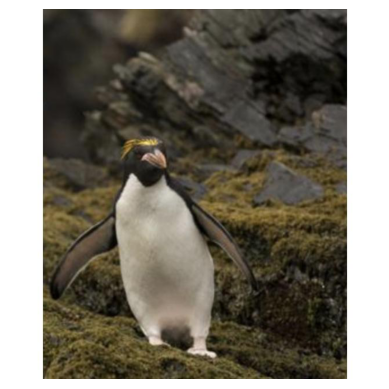

1/1 [==============================] - 0s 68ms/step
Label: Pinguim
Previsão: Tartaruga
Probabilidade: 0.50984246




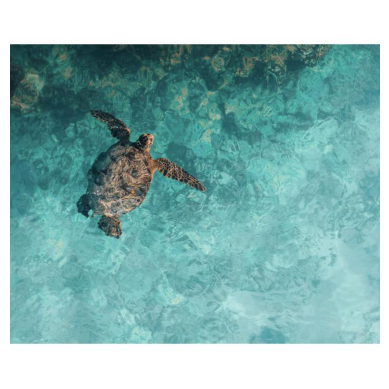

1/1 [==============================] - 0s 66ms/step
Label: Tartaruga
Previsão: Tartaruga
Probabilidade: 0.32986498




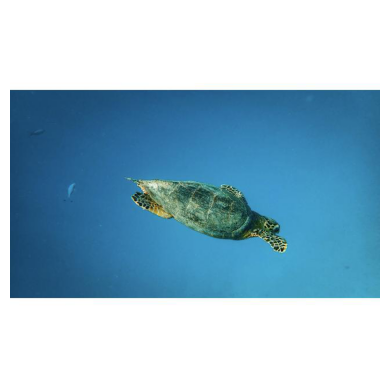

1/1 [==============================] - 0s 67ms/step
Label: Tartaruga
Previsão: Tartaruga
Probabilidade: 0.7491038




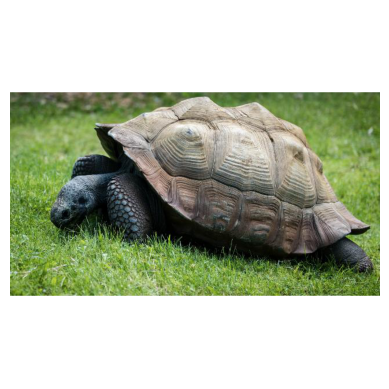

1/1 [==============================] - 1s 754ms/step
Label: Tartaruga
Previsão: Tartaruga
Probabilidade: 0.5165408




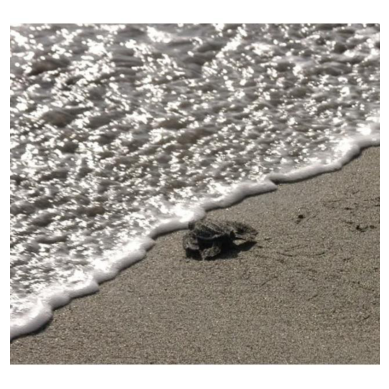

1/1 [==============================] - 0s 73ms/step
Label: Tartaruga
Previsão: Tartaruga
Probabilidade: 0.26034978




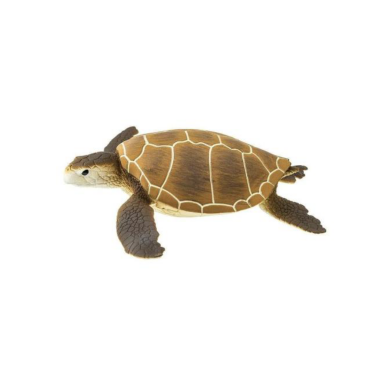

1/1 [==============================] - 0s 74ms/step
Label: Tartaruga
Previsão: Tartaruga
Probabilidade: 0.23860316




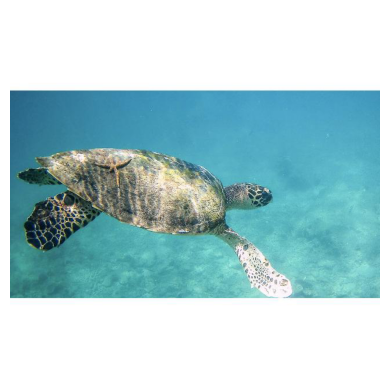

1/1 [==============================] - 0s 59ms/step
Label: Tartaruga
Previsão: Tartaruga
Probabilidade: 0.50693434




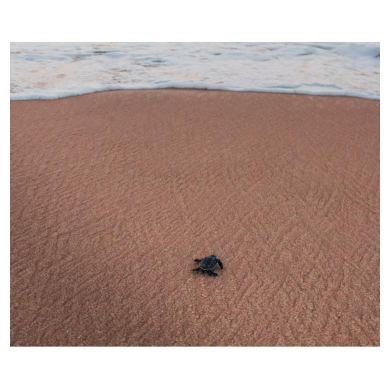

1/1 [==============================] - 0s 83ms/step
Label: Tartaruga
Previsão: Tartaruga
Probabilidade: 0.41871962




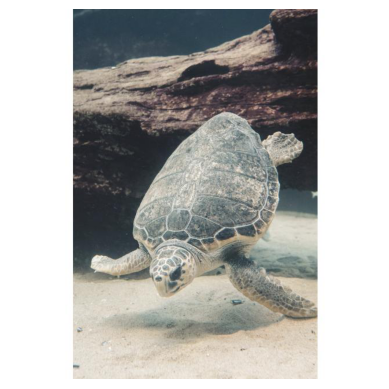

1/1 [==============================] - 0s 73ms/step
Label: Tartaruga
Previsão: Tartaruga
Probabilidade: 0.26512924




In [81]:

count_images = 0
class_names = ['Tartaruga', 'Pinguim']
y_pred = []
y_true = []

# Percorrendo a pasta onde estão salvas as imagens de teste
for subdir, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith('.png') or file.endswith('.jpg'):
            count_images += 1
            split_path = os.path.join(subdir, file).split('/')
            label = split_path[2]
            y_true.append(label)

            img_path = os.path.join(subdir, file)
            img = Image.open(img_path)
            plt.imshow(img)
            plt.axis('off')  # Para não mostrar os eixos
            plt.show()

            img = image.load_img(img_path, target_size=(img_height, img_width))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            x = x.astype('float32') / 255.0

            # Previsão
            prediction = model.predict(x)

            # Printando as saídas do modelo
            predicted_class = np.argmax(prediction[0])
            probability = prediction[0][predicted_class]
            y_pred.append(class_names[predicted_class])
            print("Label:", label)
            print("Previsão:", class_names[predicted_class])
            print("Probabilidade:", probability)
            print("\n")

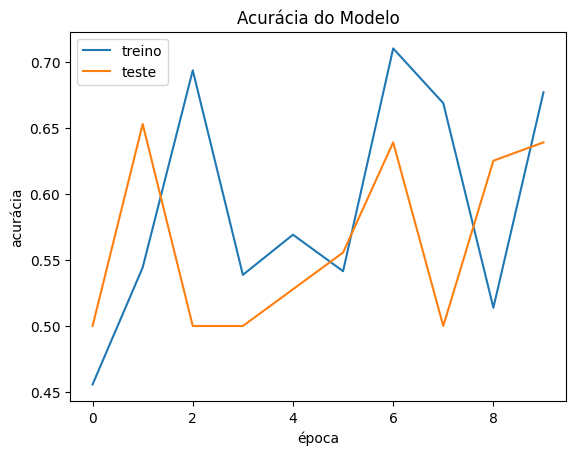

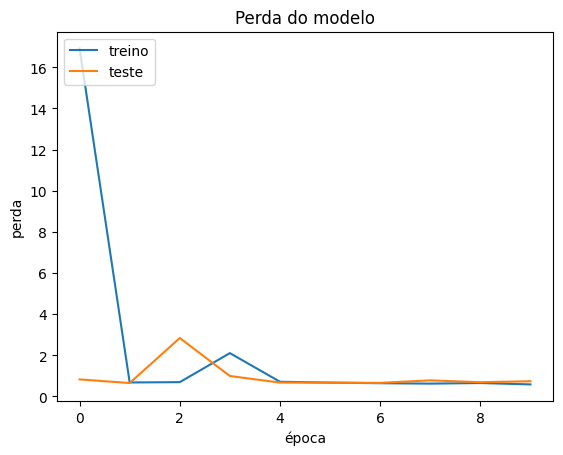

In [85]:
# lista todos os dados contidos no histórico de treinamento

# plota a acurácia a partir do histórico
plt.plot(history.history['accuracy'])  # acurácia do treinamento
plt.plot(history.history['val_accuracy']) # acurácia na validação (teste)
plt.title('Acurácia do Modelo')
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()

# plota o erro/perda a partir do histórico
plt.plot(history.history['loss']) # perda/erro durante o treinamento
plt.plot(history.history['val_loss']) #perda/erro durante a validação (teste)
plt.title('Perda do modelo')
plt.ylabel('perda')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper left')
plt.show()


1/1 [==============================] - 1s 848ms/step


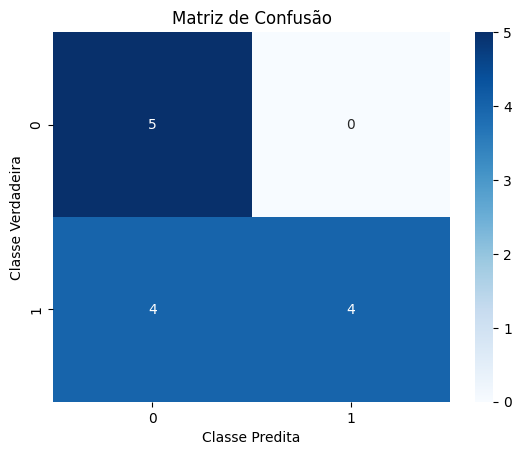

In [84]:
# Fazer as previsões no subconjunto de imagens de teste
y_pred = model.predict(test_generator)
#y_pred = np.argmax(y_pred, axis=1)  # Converte as previsões para as classes preditas

# Aplicar a regra de atribuição de 0 ou 1
for i in range(len(y_pred)):
    if y_pred[i] < 0.5:
        y_pred[i] = 0
    else:
        y_pred[i] = 1
# Obter os rótulos verdadeiros do subconjunto de imagens de teste
y_true = test_generator.classes

# Calcular a matriz de confusão
confusion = confusion_matrix(y_true, y_pred)

# Criar um heatmap da matriz de confusão
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")

# Definir rótulos dos eixos
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')

# Definir título do gráfico
plt.title('Matriz de Confusão')

# Exibir o gráfico
plt.show()

o modelo apresentado não é o ideal, ainda apresenta lacunas de aprendizado, principalmente na validação, um modelo mais robusto seria mais aprorpiado e um banoc de imagens muito maior.